# NLP Keyword Extraction in Text using KeyBERT and Machine Learning
* Notebook by Adam Lang
* Date: 7/15/2024

# Overview
* We will go over how to use KeyBERT and briefly explain how this compares to other NLP extraction methods.
* KeyBERT is an efficient keyword extraction library that leverages BERT embeddings.
* It can be leveraged to extract keywords from text and is particularly useful for summarizing and categorizing large datasets.

## What is KeyBERT?
* KeyBERT vectorizes input text using a BERT model of your choice.
* Next, it compares the vector of each word in the text to the vector of the document as a whole.
  * KeyBERT effectively has a measure of how similar each individual word is to the document; in other words, it knows the relevance of each word to the document as whole.
  * Like other keyword extraction methods, this works with the presumption that the words that are most similar to the document are the keywords, or potential subjects of the text.


## How is KeyBERT different from BERTopic?
* KeyBERT github: https://maartengr.github.io/KeyBERT/

### BERTopic Workflow
1. Embedding documents using BERT transformer encoder.
2. Clustering documents
3. Creating a topic representation.

The main output of BERTopic is a set of words per topic. Thus, multiple documents have the same topic representation.

### **KeyBERT Workflow**
1. Embedding documents using BERT transformer encoder.
2. Creating candidate keywords
2. Calculating best keywords through either MMR, Max Sum Similarity, or Cosine Similarity.

* The main output of KeyBERT is a set of words per document. Thus, each document is expected to have **different** keywords.
* Algorithmic model for keybert:

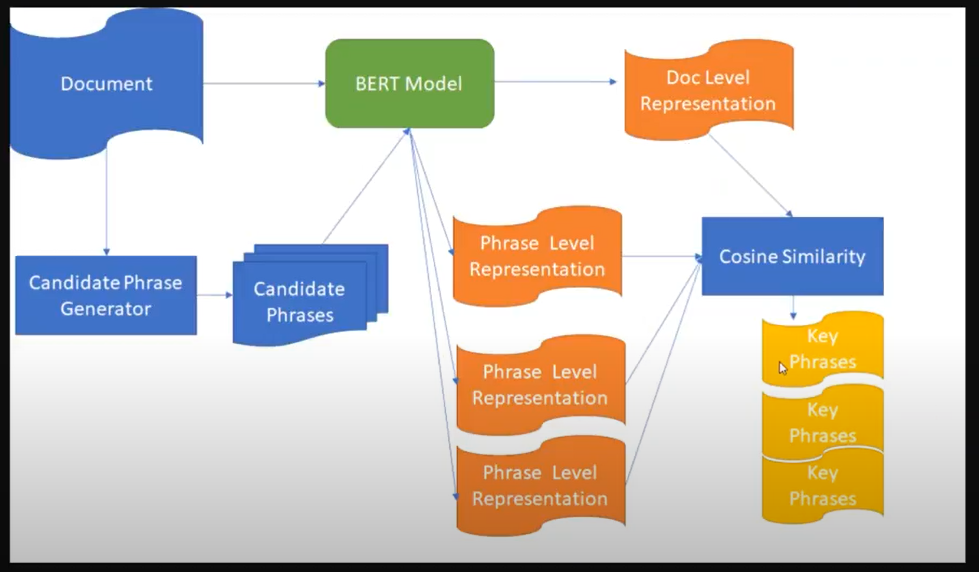



### So how are they the same?
* Both embed documents and leverage MMR (although both models may opt not to).

### The Difference(s)?
* The main difference is everything that happens between embedding documents and, in some cases, leveraging MMR.
   * For example, BERTopic aims to cluster documents and create a broad representation of multiple documents whereas **KeyBERT does not.**
   
   * Also the BERTopic algorithmic implementation (UMAP/HDBSCAN/c-TF-IDF) is quite different from generating candidate keywords in KeyBERT and comparing them to the individual documents.


## What are some other NLP extraction or tokenization methods?
1. **CountVectorizer**
   * Note: While this is an efficent way to count words in a corpus, it is not as "quick" as using the **Counter** from Python.
   * A CountVectorizer converts text documents into matrix of token frequencies or occurrences.
   * Text is transformed into a sparse matrix and stored in a vocabulary.
   * The default tokenization in CountVectorizer removes all special characters, punctuation and single characters.
   * The CountVectorize also allows you to work with n-grams, stop words, and other text preprocessing steps.
         * Excellent resource:  https://kavita-ganesan.com/how-to-use-countvectorizer/

   * Note: There is also the HashingVectorizer which does the same thing as the CountVectorizer but the HashingVectorizer does not store a vocabulary.
       * Positives: eliminates large memory storage of tokens for large datasets.
       * Cons: Not possible to lookup or retrieve token position in matrix.
         * Resource: https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#:~:text=HashingVectorizer%20and%20CountVectorizer%20are%20meant,(i.e.%20the%20unique%20tokens).
2.  **TF-IDF**
      * Determines how significant a term is to a text in a series or a corpus.
      * tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf).
      * The words with higher scores of weight are deemed to be more significant.
      * Usually, the tf-idf weight consists of two terms-
         * 1. Normalized Term Frequency (tf)
         * 2. Inverse Document Frequency (idf)

3. YAKE!
* Unsupervised automatic keyword extraction method that relies on statistical text features extracted from individual documents to identify the most relevant keywords in the text.
* Yake does not need to be trained on a particular set of documents, nor does it depend on dictionaries, text size, domain, or language.
* Yake defines a set of five features capturing keyword characteristics which are heuristically combined to assign a single score to every keyword.
   * The lower the score, the more significant the keyword will be.


4. Rake
*  "Rapid Automatic Keyword Extraction".
* This is a method of extracting keywords from individual documents. It can also be applied to new fields very easily and is very effective in dealing with multiple types of documents, especially text that requires specific grammatical conventions.
* Rake identifies key phrases in a text by analyzing the occurrence of a word and its compatibility with other words in the text (co-occurrence).


5. TextRank
* Unsupervised method for extracting keywords and sentences.
* Based on a graph where each node is a word, and edges represent relationships between words which are formed by defining the co-occurrence of words within a moving window of a predetermined size.
* The algorithm is inspired by **PageRank** which was used by Google to rank websites.
    * It first Tokenizes and annotates text with Part of Speech (PoS).
    * It only considers single words.
    * No n-grams are used, multi-words are reconstructed later.
    * An edge is created if lexical units co-occur within a window of N-words to obtain an unweighted undirected graph.
    * Then it runs the text rank algorithm to rank the words.
    * The most important lexical words are selected and then adjacent keywords are folded into a multi-word keyword.

6. Keyword spaCy
* a spaCy pipeline component for extracting keywords from text using cosine similarity based on the KeyBERT algorithm.
   * Source: https://pypi.org/project/keyword-spacy/

* spaCy note: There are other algorithm implementations in spaCY including TextRank above as **PyTextRank**.
    * Source: https://spacy.io/universe/project/spacy-pytextrank

# KeyBERT implementation
* You can use language models from spacy, gensim and flare but we will use out of the box models from KeyBERT.

In [1]:
# install
!pip install keybert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

## Data
* We will use random text data from the book `Dracula` by Bram Stoker.
* Why is it good to test this on random documents that you have never read? Well thats the point, we assume that as a Data Scientist you are tasked with pulling the information from the document!


In [14]:
text1 = """"
Presently the horses began to scream, and tore at their tethers till I
came to them and quieted them. When they did feel my hands on them, they
whinnied low as in joy, and licked at my hands and were quiet for a
time. Many times through the night did I come to them, till it arrive to
the cold hour when all nature is at lowest; and every time my coming was
with quiet of them. In the cold hour the fire began to die, and I was
about stepping forth to replenish it, for now the snow came in flying
sweeps and with it a chill mist. Even in the dark there was a light of
some kind, as there ever is over snow; and it seemed as though the
snow-flurries and the wreaths of mist took shape as of women with
trailing garments. All was in dead, grim silence only that the horses
whinnied and cowered, as if in terror of the worst. I began to
fear--horrible fears; but then came to me the sense of safety in that
ring wherein I stood. I began, too, to think that my imaginings were of
the night, and the gloom, and the unrest that I have gone through, and
all the terrible anxiety. It was as though my memories of all Jonathan’s
horrid experience were befooling me; for the snow flakes and the mist
began to wheel and circle round, till I could get as though a shadowy
glimpse of those women that would have kissed him. And then the horses
cowered lower and lower, and moaned in terror as men do in pain. Even
the madness of fright was not to them, so that they could break away. I
feared for my dear Madam Mina when these weird figures drew near and
circled round. I looked at her, but she sat calm, and smiled at me; when
I would have stepped to the fire to replenish it, she caught me and held
me back, and whispered, like a voice that one hears in a dream, so low
it was:--
"""

text2 = """"
I only slept a few hours when I went to bed, and feeling that I could
not sleep any more, got up. I had hung my shaving glass by the window,
and was just beginning to shave. Suddenly I felt a hand on my shoulder,
and heard the Count’s voice saying to me, “Good-morning.” I started, for
it amazed me that I had not seen him, since the reflection of the glass
covered the whole room behind me. In starting I had cut myself slightly,
but did not notice it at the moment. Having answered the Count’s
salutation, I turned to the glass again to see how I had been mistaken.
This time there could be no error, for the man was close to me, and I
could see him over my shoulder. But there was no reflection of him in
the mirror! The whole room behind me was displayed; but there was no
sign of a man in it, except myself. This was startling, and, coming on
the top of so many strange things, was beginning to increase that vague
feeling of uneasiness which I always have when the Count is near; but at
the instant I saw that the cut had bled a little, and the blood was
trickling over my chin. I laid down the razor, turning as I did so half
round to look for some sticking plaster. When the Count saw my face, his
eyes blazed with a sort of demoniac fury, and he suddenly made a grab at
my throat. I drew away, and his hand touched the string of beads which
held the crucifix. It made an instant change in him, for the fury passed
so quickly that I could hardly believe that it was ever there.
"""

text3 = """"
I knew that there were at least three graves to find--graves that are
inhabit; so I search, and search, and I find one of them. She lay in her
Vampire sleep, so full of life and voluptuous beauty that I shudder as
though I have come to do murder. Ah, I doubt not that in old time, when
such things were, many a man who set forth to do such a task as mine,
found at the last his heart fail him, and then his nerve. So he delay,
and delay, and delay, till the mere beauty and the fascination of the
wanton Un-Dead have hypnotise him; and he remain on and on, till sunset
come, and the Vampire sleep be over. Then the beautiful eyes of the fair
woman open and look love, and the voluptuous mouth present to a
kiss--and man is weak. And there remain one more victim in the Vampire
fold; one more to swell the grim and grisly ranks of the Un-Dead!...
"""

text4 = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """

## Imports

In [3]:
## import keybert
from keybert import KeyBERT

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## Embedding Models
* KeyBERT supports numerous embedding models including:
   * Sentence-Transformers
   * Flair
   * Spacy
   * Gensim
   * USE
   * Full list: https://maartengr.github.io/KeyBERT/guides/embeddings.html

* Instantiation of an embedding model.
   * Here we will use the default SentenceTransformer and most popular model `all-MiniLM-L6-v2` transformer.



In [15]:
## load default model
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

## Keyword Extraction
* We can now extract keywords using the transformer model from our documents.

In [18]:
## extract keywords
keywords = kw_model.extract_keywords(text4)
keywords

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947)]

### N-gram extraction
* Range extraction

In [19]:
## n-gram extraction (lower range, higher range)
kw_model.extract_keywords(text4, keyphrase_ngram_range=(2,3), stop_words=None)

[('supervised learning is', 0.72),
 ('supervised learning algorithm', 0.6992),
 ('supervised learning', 0.6779),
 ('in supervised learning', 0.6624),
 ('signal supervised', 0.6152)]

In [21]:
## n-grams
kw_model.extract_keywords(text3, keyphrase_ngram_range=(1,2),stop_words=None)

[('the vampire', 0.5339),
 ('vampire sleep', 0.5125),
 ('vampire', 0.4996),
 ('vampire fold', 0.4741),
 ('her vampire', 0.4552)]

### Stop Words
* We can remove stop words as well.

In [22]:
# stop word removal
kw_model.extract_keywords(text4, keyphrase_ngram_range=(3,3), stop_words="english",
                       use_maxsum=True, nr_candidates=20, top_n=5)

[('learning function maps', 0.5178),
 ('training data unseen', 0.5194),
 ('learning algorithm analyzes', 0.5208),
 ('machine learning task', 0.5628),
 ('supervisory signal supervised', 0.5802)]

### Highlight Keywords

In [13]:
model.extract_keywords(text2, highlight=True)

only slept few hours when went to bed and feeling that could not sleep any more got up had hung my shaving glass by
the window and was just beginning to shave Suddenly felt hand on my shoulder and heard the Count voice saying to me
Good morning started for it amazed me that had not seen him since the reflection of the glass covered the whole 
room behind me In starting had cut myself slightly but did not notice it at the moment Having answered the Count 
salutation turned to the glass again to see how had been mistaken This time there could be no error for the man was
close to me and could see him over my shoulder But there was no reflection of him in the mirror The whole room 
behind me was displayed but there was no sign of man in it except myself This was startling and coming on the top 
of so many strange things was beginning to increase that vague feeling of uneasiness which always have when the 
Count is near but at the instant saw that the cut had bled little and the blood was trickling over my chin laid 
down the razor turning as did so half round to look for some sticking plaster When the Count saw my face his eyes 
blazed with sort of demoniac fury and he suddenly made grab at my throat drew away and his hand touched the string 
of beads which held the crucifix It made an instant change in him for the fury passed so quickly that could hardly 
believe that it was ever there

[('shave', 0.3691),
 ('shaving', 0.3665),
 ('startling', 0.3437),
 ('slept', 0.3282),
 ('saw', 0.2966)]

## Other parameters for extraction
* `use_maxsum`
   * max sum distance between pairs of data is the pairs of data for which the distance between them is maximized.
   * Maximize the candidate similarity to the document while minimizing similarity between candidates.

In [25]:
## this extracts 20 phrases and selects the top 5 that are least similar to one another
kw_model.extract_keywords(text4, keyphrase_ngram_range=(3,3), stop_words='english',
                          use_maxsum=True, nr_candidates=20, top_n=5)

[('learning function maps', 0.5178),
 ('training data unseen', 0.5194),
 ('learning algorithm analyzes', 0.5208),
 ('machine learning task', 0.5628),
 ('supervisory signal supervised', 0.5802)]

* Maximal Marginal Relevance (MMR)
   * minimizes redundancy and maximize diversity of results in text summarization tasks.
   * There is a keyword extraction algorithm called `EmbedRank` that allows us to do that.

* Diversity
   * diversity of the words/n-grams selected.

In [28]:
## MMR with high diversity
kw_model.extract_keywords(text4, keyphrase_ngram_range=(3,3), stop_words='english',
                          use_mmr=True, diversity=0.7)

[('supervised learning algorithm', 0.6992),
 ('class labels unseen', 0.3469),
 ('value called supervisory', 0.2895),
 ('unseen situations reasonable', 0.2142),
 ('pairs infers function', 0.1981)]

In [29]:
## MMR with low diversity
kw_model.extract_keywords(text4, keyphrase_ngram_range=(3,3), stop_words='english',
                          use_mmr=True, diversity=0.1)

[('supervised learning algorithm', 0.6992),
 ('supervised learning example', 0.6807),
 ('supervised learning machine', 0.6706),
 ('function labeled training', 0.663),
 ('training examples supervised', 0.625)]

We can see the low diversity difference in the 2nd example vs. the first.

## Lets try this on another new article document - Trumps VP pick
* source: https://apnews.com/article/trump-vice-president-vance-rubio-burgum-rnc-6cc438a8370a21b2631f5a53b06b71d0

In [30]:
doc = """
MILWAUKEE (AP) — Former President Donald Trump chose Sen. JD Vance of Ohio as his running mate on Monday, picking a onetime critic who became a loyal ally and is now the first millennial to join a major-party ticket at a time of deep concern about the advanced age of America’s political leaders.

“After lengthy deliberation and thought, and considering the tremendous talents of many others, I have decided that the person best suited to assume the position of Vice President of the United States is Senator J.D. Vance of the Great State of Ohio,” Trump said in a post on his Truth Social network as the Republican National Convention got underway in Milwaukee.

The 39-year-old Vance rose to national fame with the 2016 publication of his memoir, “Hillbilly Elegy.” He was elected to the Senate in 2022 and has become one of the staunchest champions of the former president’s “Make America Great Again” agenda, particularly on trade, foreign policy and immigration.

But he is largely untested in national politics and is joining the Trump ticket at an extraordinary moment. An attempted assassination of Trump at a rally Saturday has shaken the campaign, bringing new attention to the nation’s coarse political rhetoric and reinforcing the importance of those who are one heartbeat away from the presidency.

Why Vance was chosen over the other finalists
Vance, Trump said, “will be strongly focused on the people he fought so brilliantly for, the American Workers and Farmers in Pennsylvania, Michigan, Wisconsin, Ohio, Minnesota, and far beyond.” Several of those Midwestern states are expected to play a critical role in November’s election.

The pick is sure to energize Trump’s loyal base. Vance has become a fixture on the conservative media circuit and frequently spars with reporters on Capitol Hill, helping establish him as the kind of leader who could carry Trump’s mantle into the future, beginning with the next presidential election in 2028.

But the pick also means that two white men will now lead the Republican ticket at a time when Trump has sought to make inroads with Black and Latino voters.

In “Hillbilly Elegy,” Vance detailed life in Appalachian communities that drifted from a Democratic Party many residents found disconnected from their daily travails. While the book was a bestseller, it was also criticized for sometimes oversimplifying rural life and ignoring the role of racism in modern politics.
"""

In [31]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), stop_words=None)


[('is senator vance', 0.6799),
 ('senator vance of', 0.6669),
 ('vance trump', 0.6622),
 ('sen jd vance', 0.6549),
 ('senator vance', 0.6547)]

We can see above how without eliminating the stop words they are included in the top keywords (e.g. is, of)

In [32]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), stop_words='english',
                          use_maxsum=True, nr_candidates=20, top_n=5)

[('hillbilly elegy elected', 0.5552),
 ('voters hillbilly elegy', 0.5689),
 ('vance ohio running', 0.5893),
 ('vance trump said', 0.5905),
 ('jd vance', 0.6177)]

We can see above how the algorithn normalizes the text to lowercase using the CountVectorizer under the hood.

In [34]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3,3), stop_words='english',
                          use_mmr=True, diversity=0.7)

[('states senator vance', 0.6639),
 ('carry trump mantle', 0.2876),
 ('book bestseller criticized', 0.1216),
 ('concern advanced age', 0.0842),
 ('party residents disconnected', 0.0548)]

In [35]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3,3), stop_words='english',
                          use_mmr=True, diversity=0.1)

[('states senator vance', 0.6639),
 ('sen jd vance', 0.6549),
 ('senator vance great', 0.65),
 ('jd vance ohio', 0.6329),
 ('hillbilly elegy vance', 0.6048)]

# Another implementation of KeyBERT using SentenceTransformers

In [36]:
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

# model
sent_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
kw_model = KeyBERT(model=sent_model)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [38]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), stop_words=None)

[('vance trump', 0.6825),
 ('is senator vance', 0.6719),
 ('presidency why vance', 0.6571),
 ('senator vance of', 0.6569),
 ('sen jd vance', 0.6554)]

In [37]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1,3), stop_words='english',
                          use_maxsum=True, nr_candidates=20, top_n=5)

[('trump chose sen', 0.4981),
 ('vice president united', 0.5001),
 ('vance ohio', 0.5063),
 ('vance chosen finalists', 0.5155),
 ('loyal base vance', 0.5209)]

Summary:
* The results are different than using the default keybert model above. So this is interesting because you can finetune the keybert model using huggingface.

In [39]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(2,5), stop_words='english',
                          use_mmr=True, diversity=0.8)

[('trump chose sen jd vance', 0.7825),
 ('means white men', 0.1681),
 ('great state ohio', 0.0932),
 ('frequently spars reporters', 0.0197),
 ('mantle future beginning', -0.0738)]

In [40]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(2,5), stop_words='english',
                          use_mmr=True, diversity=0.2)

[('trump chose sen jd vance', 0.7825),
 ('chose sen jd vance ohio', 0.7076),
 ('presidency vance chosen', 0.7034),
 ('president united states senator vance', 0.6865),
 ('vance trump', 0.6825)]

Summary
* Overall this is a very simple library that utilizes SentenceTransformers to embed the text and utilize cosine similarity and other distance comparison metrics to extract keywords from text.
* If we wanted to do a more in depth NLP analysis we may consider another library mentioned above or use BERTopic which has all the nuts and bolts.
* However, compared to classical NLP techniques such as CountVectorizer and TF-IDF, this is more modern persay leveraging BERT.